# Domain : Healthcare
# Model :  Regression model on life expectancy dataset

In [2]:
pip install pyforest

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyforest
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

<IPython.core.display.Javascript object>

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

In [5]:
df.dtypes
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
null_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
print(null_columns)

['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

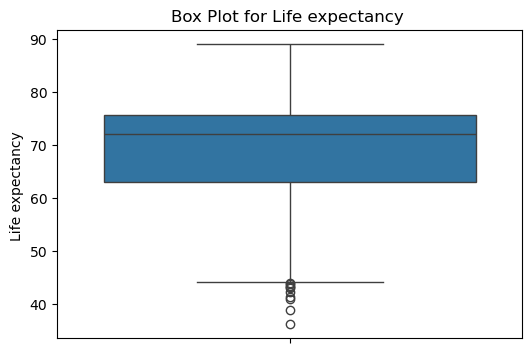

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

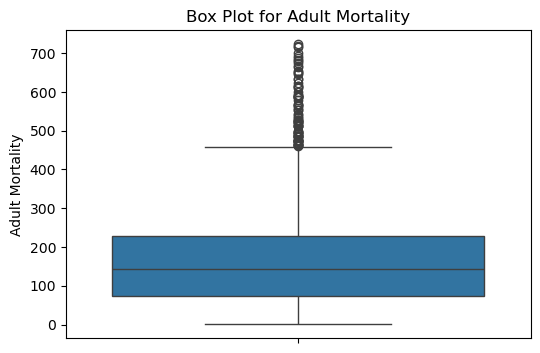

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

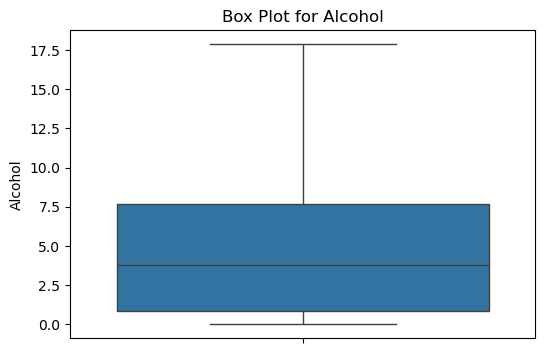

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

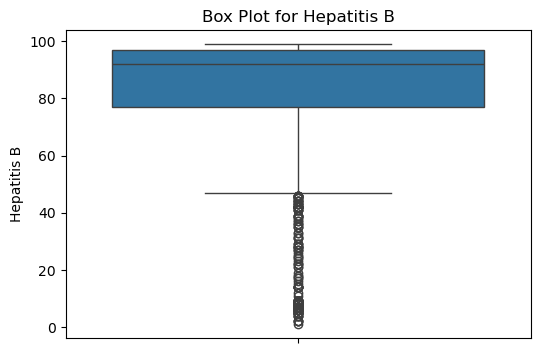

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

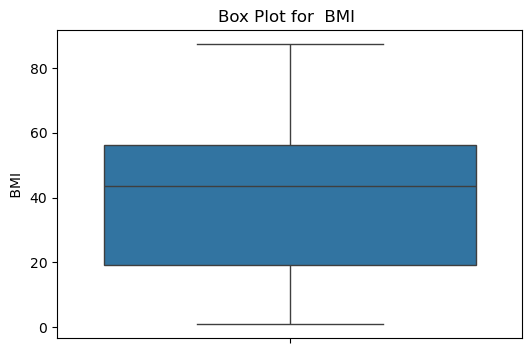

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

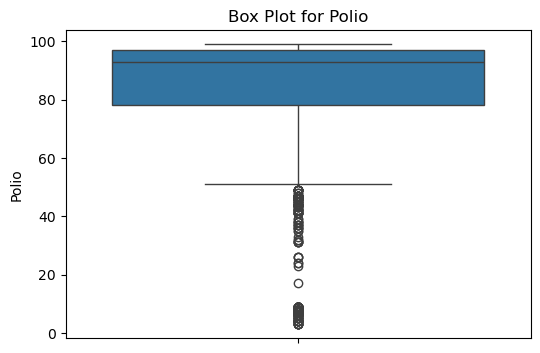

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

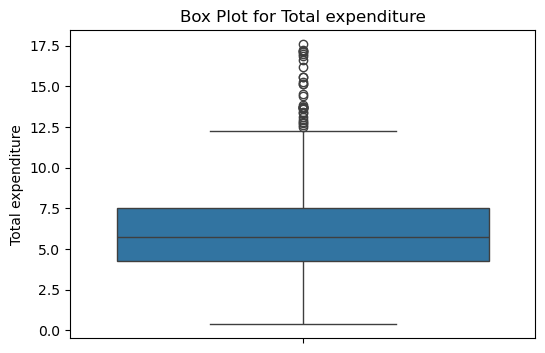

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

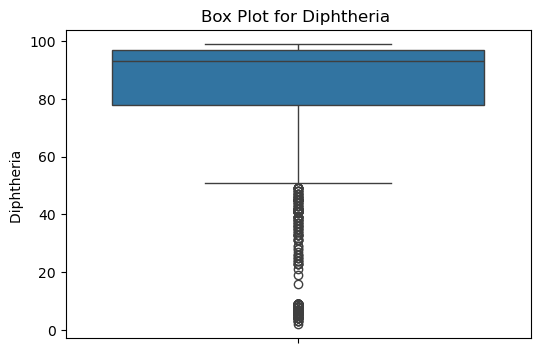

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

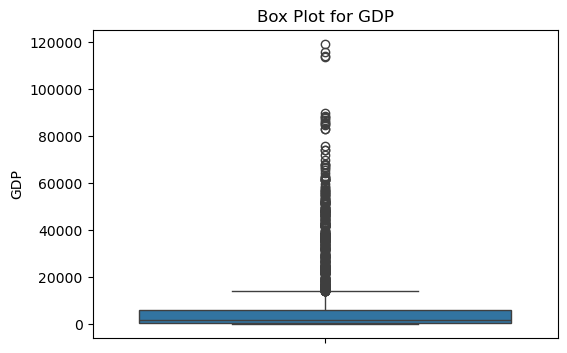

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

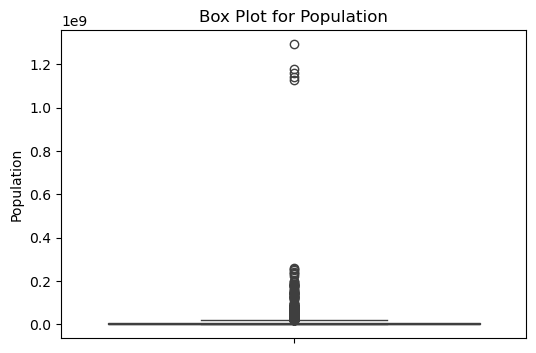

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

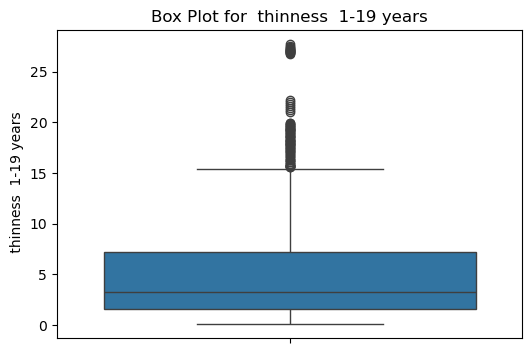

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

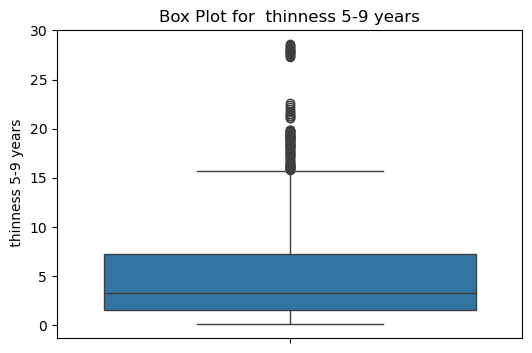

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

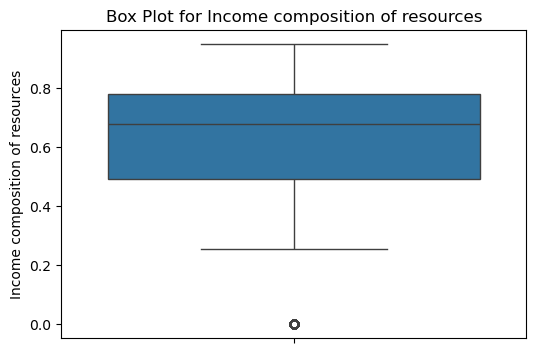

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

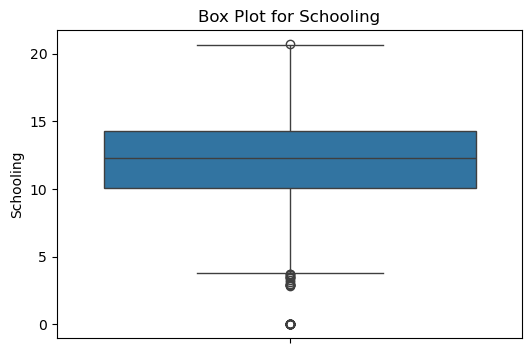

In [7]:
for col in null_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [8]:
df[[ 'Adult Mortality','Hepatitis B' , 'Polio' , 'Total expenditure']] = df[[ 'Adult Mortality','Hepatitis B' , 'Polio' , 'Total expenditure']].fillna(df[[ 'Adult Mortality','Hepatitis B' , 'Polio' , 'Total expenditure']].median())
df.isnull().sum()
df[['Diphtheria ', 'GDP', 'Population', 'Income composition of resources', 'Schooling']] = df[['Diphtheria ', 'GDP', 'Population', 'Income composition of resources', 'Schooling']].fillna(df[['Diphtheria ', 'GDP', 'Population', 'Income composition of resources', 'Schooling']].median())
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources      0
Schooling                            0
dtype: int64

In [9]:
print(df.columns)
df.columns = df.columns.str.strip()
df['BMI'].fillna(df.get('BMI', pd.Series()).mean(), inplace=True)
print([col for col in df.columns])

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


<IPython.core.display.Javascript object>

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


C:\Users\rites\AppData\Local\Temp\ipykernel_21924\2101966912.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df.get('BMI', pd.Series()).mean(), inplace=True)


In [10]:
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)


C:\Users\rites\AppData\Local\Temp\ipykernel_21924\4052260490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)


In [11]:
print(df.columns)
df.columns = df.columns.str.strip()
df['Life expectancy'].fillna(df.get('Life expectancy', pd.Series()).median(), inplace=True)
print([col for col in df.columns])

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


<IPython.core.display.Javascript object>

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


C:\Users\rites\AppData\Local\Temp\ipykernel_21924\268989303.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Life expectancy'].fillna(df.get('Life expectancy', pd.Series()).median(), inplace=True)


In [12]:
print(df.columns.tolist())
df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].median(), inplace=True)

df.columns = df.columns.str.replace(' ', '_')
df['thinness__1-19_years'].fillna(df['thinness__1-19_years'].median(), inplace=True)

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


C:\Users\rites\AppData\Local\Temp\ipykernel_21924\3446731055.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].median(), inplace=True)
C:\Users\rites\AppData\Local\Temp\ipykernel_21924\3446731055.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [13]:
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_')

target_columns = ['thinness_5_9_years', 'thinness__1_19_years']
df[target_columns] = df[target_columns].fillna(df[target_columns].median())

df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1_19_years               0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [14]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
numeric_columns

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [16]:
numeric_columns.corr()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
Year,1.000000,0.170819,-0.079535,-0.037415,-0.048168,0.031400,0.021302,-0.082493,0.108327,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Life_expectancy,0.170819,1.000000,-0.696390,-0.196769,0.390675,0.381418,0.170219,-0.157767,0.560453,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult_Mortality,-0.079535,-0.696390,1.000000,0.078890,-0.189921,-0.242628,-0.123287,0.031293,-0.382143,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant_deaths,-0.037415,-0.196769,0.078890,1.000000,-0.113812,-0.085612,-0.167421,0.501128,-0.227220,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.048168,0.390675,-0.189921,-0.113812,1.000000,0.339634,0.091298,-0.051055,0.318070,-0.110777,0.212395,0.295484,0.213878,-0.048650,0.312579,-0.027341,-0.414938,-0.403881,0.419931,0.499330
percentage_expenditure,0.031400,0.381418,-0.242628,-0.085612,0.339634,1.000000,0.039528,-0.056596,0.228537,-0.087852,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
Hepatitis_B,0.021302,0.170219,-0.123287,-0.167421,0.091298,0.039528,1.000000,-0.073021,0.112438,-0.170549,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
Measles,-0.082493,-0.157767,0.031293,0.501128,-0.051055,-0.056596,-0.073021,1.000000,-0.175925,0.507809,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
BMI,0.108327,0.560453,-0.382143,-0.227220,0.318070,0.228537,0.112438,-0.175925,1.000000,-0.237586,0.282285,0.231441,0.281188,-0.243548,0.275231,-0.069700,-0.531651,-0.538533,0.476837,0.506894
under_five_deaths,-0.042937,-0.222738,0.094280,0.996629,-0.110777,-0.087852,-0.170549,0.507809,-0.237586,1.000000,-0.188864,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

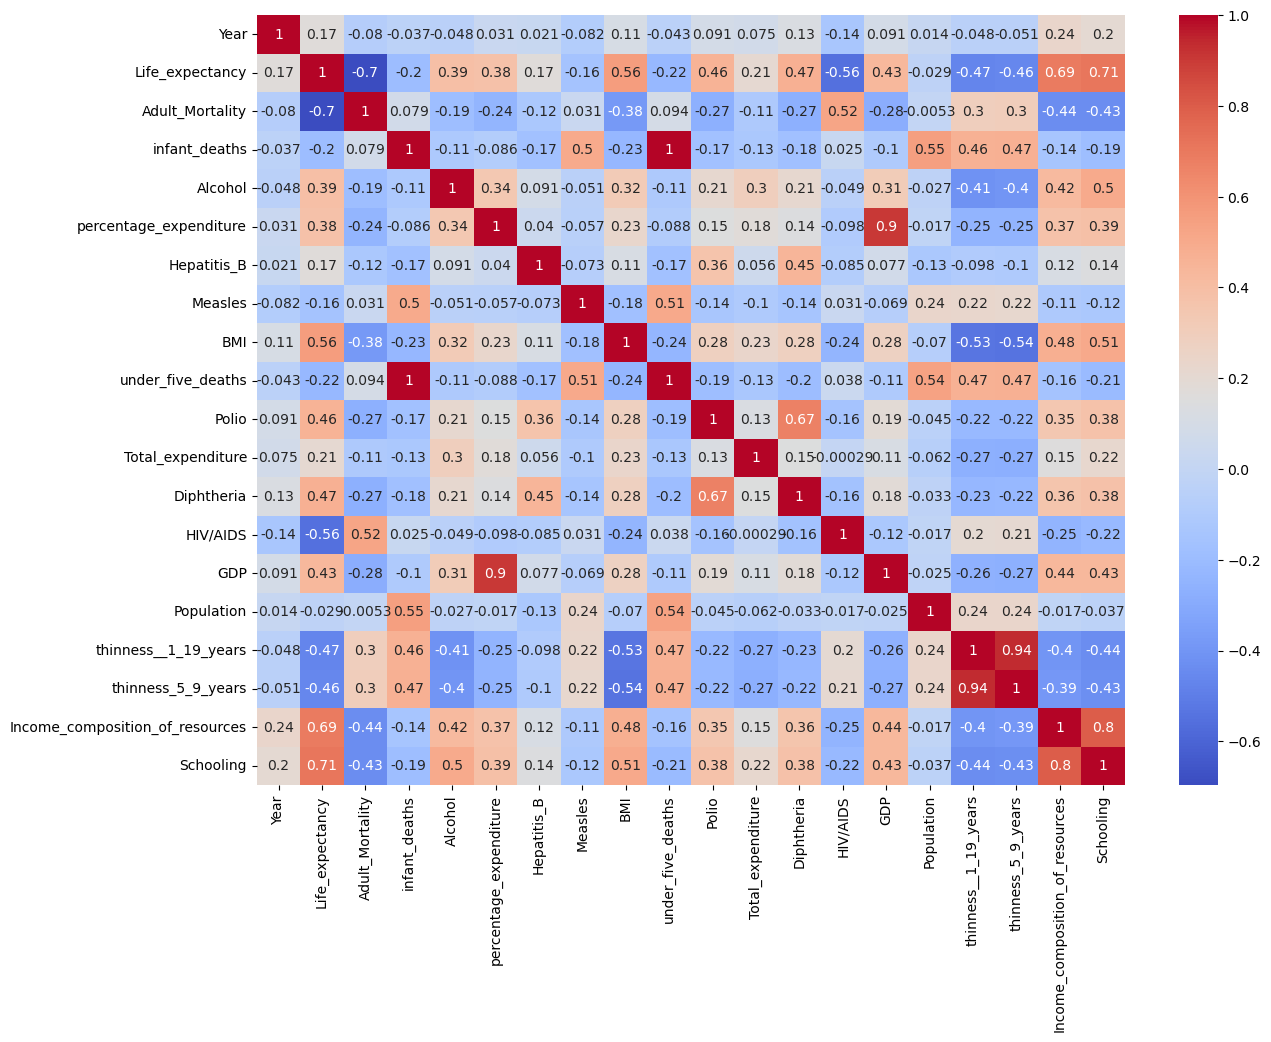

In [17]:
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm")

In [18]:
import statsmodels.api as sm
model=sm.OLS(df['Life_expectancy'],df.select_dtypes(include=['int', 'float'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life_expectancy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.265e+22
Date:                Sun, 06 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:42:59   Log-Likelihood:                          52580.
No. Observations:                2938   AIC:                                 -1.051e+05
Df Residuals:                    2918   BIC:                                 -1.050e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                             7.929e-12   5.86e-13     13.533      0.000    6.78e-12    9.08e-12
Life_expectancy                     1.0000   1.86e-11   5.37e+10      0.000       1.000       1.000
Adult_Mortality                 -3.265e-12   8.86e-13     -3.684      0.000      -5e-12   -1.53e-12
infant_deaths                     3.62e-11   8.74e-12      4.141      0.000    1.91e-11    5.33e-11
Alcohol                          3.842e-11   2.44e-11      1.571      0.116   -9.52e-12    8.64e-11
percentage_expenditure            3.91e-14   9.11e-14      0.429      0.668   -1.39e-13    2.18e-13
Hepatitis_B                      5.405e-12   3.77e-12      1.434      0.152   -1.99e-12    1.28e-11
Measles                          4.095e-15   7.75e-15      0.528      0.597   -1.11e-14    1.93e-14
BMI                              1.993e-12   5.06e-12      0.394      0.694   -7.93e-12    1.19e-11
under_five_deaths                -5.33e-11   6.41e-12     -8.313      0.000   -6.59e-11   -4.07e-11
Polio                           -1.974e-12   4.54e-12     -0.435      0.664   -1.09e-11    6.93e-12
Total_expenditure               -4.496e-11   3.44e-11     -1.307      0.191   -1.12e-10    2.25e-11
Diphtheria                       6.567e-12   4.76e-12      1.381      0.167   -2.76e-12    1.59e-11
HIV/AIDS                        -4.363e-13   1.98e-11     -0.022      0.982   -3.93e-11    3.84e-11
GDP                             -4.319e-16   1.39e-14     -0.031      0.975   -2.77e-14    2.68e-14
Population                       8.188e-18   1.71e-18      4.788      0.000    4.84e-18    1.15e-17
thinness__1_19_years             -2.22e-16    5.1e-11  -4.35e-06      1.000      -1e-10       1e-10
thinness_5_9_years               -1.11e-16   5.02e-11  -2.21e-06      1.000   -9.85e-11    9.85e-11
Income_composition_of_resources -8.882e-15   6.46e-10  -1.37e-05      1.000   -1.27e-09    1.27e-09
Schooling                        7.772e-16   4.39e-11   1.77e-05      1.000   -8.61e-11    8.61e-11
==============================================================================
Omnibus:                     4348.336   Durbin-Watson:                   0.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1434919.080
Skew:                           9.000   Prob(JB):                         0.00
Kurtosis:                     109.759   Cond. No.                     4.70e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The conditi

In [19]:
df.drop(['thinness_5_9_years','percentage_expenditure','Adult_Mortality','Measles','BMI','under_five_deaths','Polio','thinness__1_19_years','Schooling'], axis=1,inplace=True)
df.head()

,Country,Year,Status,Life_expectancy,infant_deaths,Alcohol,Hepatitis_B,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_composition_of_resources
0,Afghanistan,2015,Developing,65.0,62,0.01,65.0,8.16,65.0,0.1,584.259210,33736494.0,0.479
1,Afghanistan,2014,Developing,59.9,64,0.01,62.0,8.18,62.0,0.1,612.696514,327582.0,0.476
2,Afghanistan,2013,Developing,59.9,66,0.01,64.0,8.13,64.0,0.1,631.744976,31731688.0,0.470
3,Afghanistan,2012,Developing,59.5,69,0.01,67.0,8.52,67.0,0.1,669.959000,3696958.0,0.463
4,Afghanistan,2011,Developing,59.2,71,0.01,68.0,7.87,68.0,0.1,63.537231,2978599.0,0.454


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

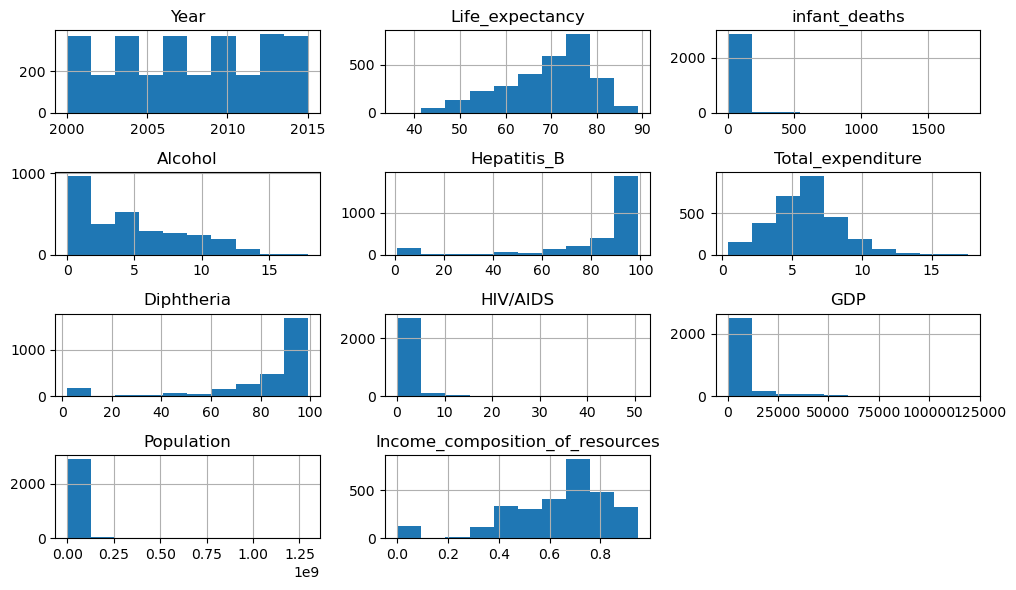

In [20]:
df.hist(bins=10, figsize=(10, 6))

plt.tight_layout()
plt.show()

In [21]:
con_fea=[feature for feature in df.columns if df[feature].nunique()>20]
con_fea

['Country',
 'Life_expectancy',
 'infant_deaths',
 'Alcohol',
 'Hepatitis_B',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Income_composition_of_resources']

In [22]:
con_fea.remove('Country')
con_fea

['Life_expectancy',
 'infant_deaths',
 'Alcohol',
 'Hepatitis_B',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Income_composition_of_resources']

In [23]:
for feature in con_fea:
  if 0 in df[feature].unique():
    pass
  else:
    df[feature]=np.log(df[feature])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

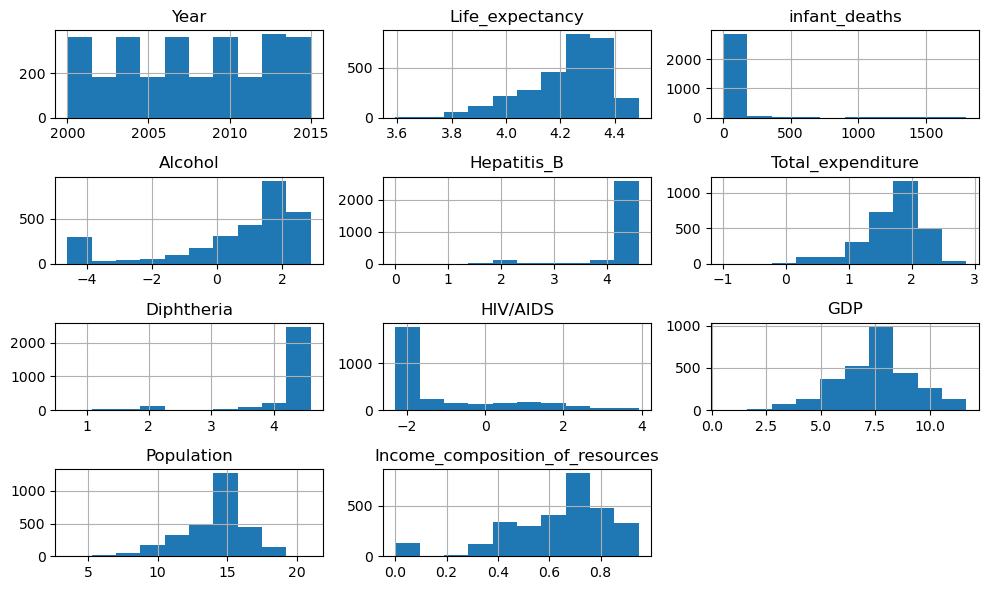

In [24]:
df.hist(bins=10, figsize=(10, 6))

plt.tight_layout()
plt.show()

In [25]:
target=df['Life_expectancy']
target

0       4.174387
1       4.092677
2       4.092677
3       4.085976
4       4.080922
          ...   
2933    3.790985
2934    3.795489
2935    3.802208
2936    3.813307
2937    3.828641
Name: Life_expectancy, Length: 2938, dtype: float64

In [26]:
df.drop('Life_expectancy',axis=1,inplace=True)


In [27]:
df

,Country,Year,Status,infant_deaths,Alcohol,Hepatitis_B,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_composition_of_resources
0,Afghanistan,2015,Developing,62,-4.605170,4.174387,2.099244,4.174387,-2.302585,6.370345,17.334091,0.479
1,Afghanistan,2014,Developing,64,-4.605170,4.127134,2.101692,4.127134,-2.302585,6.417870,12.699494,0.476
2,Afghanistan,2013,Developing,66,-4.605170,4.158883,2.095561,4.158883,-2.302585,6.448486,17.272826,0.470
3,Afghanistan,2012,Developing,69,-4.605170,4.204693,2.142416,4.204693,-2.302585,6.507217,15.123021,0.463
4,Afghanistan,2011,Developing,71,-4.605170,4.219508,2.063058,4.219508,-2.302585,4.151626,14.906964,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,27,1.472472,4.219508,1.964311,4.174387,3.514526,6.118904,16.363197,0.407
2934,Zimbabwe,2003,Developing,26,1.401183,1.945910,1.874874,4.219508,3.602777,6.116667,16.351894,0.418
2935,Zimbabwe,2002,Developing,25,1.488400,4.290459,1.876407,4.262680,3.683867,4.049144,11.740260,0.427
2936,Zimbabwe,2001,Developing,25,0.542324,4.330733,1.818077,4.317488,3.740048,6.307346,16.330475,0.427


In [28]:
df_encoded = pd.get_dummies(df.select_dtypes(include='object'),drop_first=True)
df_encoded.head()

<IPython.core.display.Javascript object>

,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [29]:
df.drop(df.select_dtypes(include='object'), axis=1,inplace=True)
df=pd.concat([df,df_encoded],axis=1)
df.head()

<IPython.core.display.Javascript object>

,Year,infant_deaths,Alcohol,Hepatitis_B,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_composition_of_resources,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,62,-4.60517,4.174387,2.099244,4.174387,-2.302585,6.370345,17.334091,0.479,...,False,False,False,False,False,False,False,False,False,True
1,2014,64,-4.60517,4.127134,2.101692,4.127134,-2.302585,6.417870,12.699494,0.476,...,False,False,False,False,False,False,False,False,False,True
2,2013,66,-4.60517,4.158883,2.095561,4.158883,-2.302585,6.448486,17.272826,0.470,...,False,False,False,False,False,False,False,False,False,True
3,2012,69,-4.60517,4.204693,2.142416,4.204693,-2.302585,6.507217,15.123021,0.463,...,False,False,False,False,False,False,False,False,False,True
4,2011,71,-4.60517,4.219508,2.063058,4.219508,-2.302585,4.151626,14.906964,0.454,...,False,False,False,False,False,False,False,False,False,True


In [30]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [31]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(df, target)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [32]:
feature_sel_model.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.4, random_state=42)

R² Score (Accuracy): 0.937319240658874
Mean Squared Error (MSE): 0.0013700194733252584


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

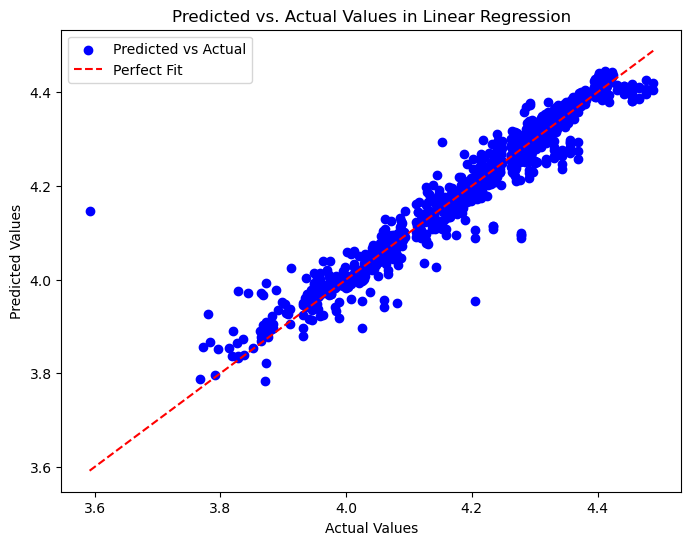

In [35]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print("R² Score (Accuracy):", r2)
print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values in Linear Regression')
plt.legend()
plt.show()

mse is 0.0013700194733252584, r2 is 0.937319240658874


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

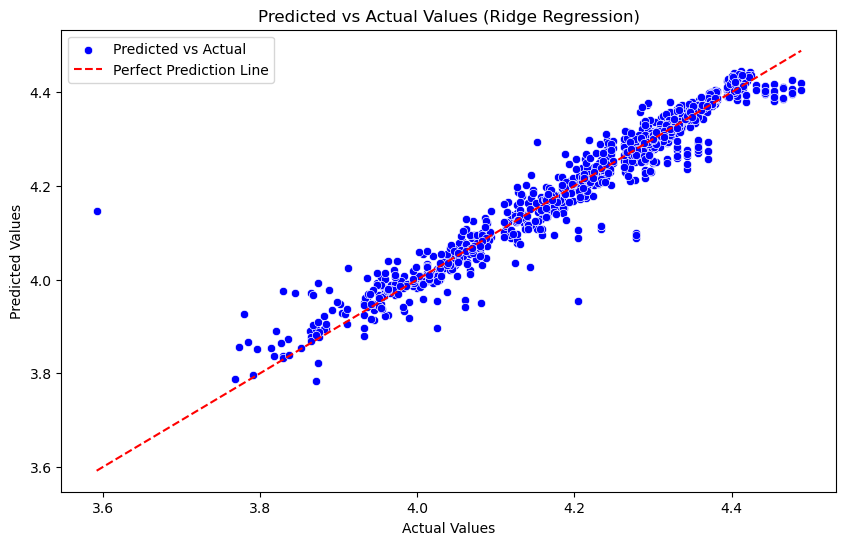

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, Y_train)
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('mse is {}, r2 is {}'.format(mse,r2))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', label='Perfect Prediction Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Ridge Regression)')
plt.legend()
plt.show()

R² Score (Accuracy): 0.5042472590492308
Mean Squared Error (MSE): 0.010835716034653976


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

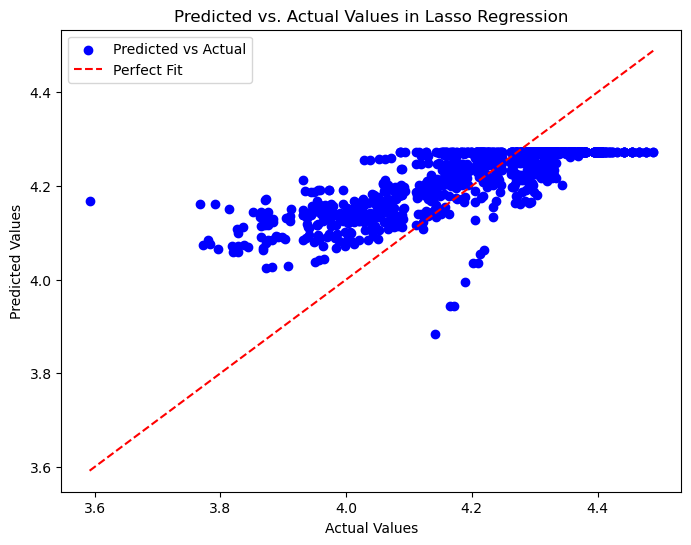

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)
Y_pred = lasso.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
print("R² Score (Accuracy):", r2)
print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values in Lasso Regression')
plt.legend()
plt.show()

In [38]:
print(df.columns)

Index(['Year', 'infant_deaths', 'Alcohol', 'Hepatitis_B', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Income_composition_of_resources',
       ...
       'Country_United States of America', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela (Bolivarian Republic of)', 'Country_Viet Nam',
       'Country_Yemen', 'Country_Zambia', 'Country_Zimbabwe',
       'Status_Developing'],
      dtype='object', length=203)


In [42]:
import numpy as np
from difflib import get_close_matches

def normalize_country_name(name):
    """Normalize country names for consistent matching"""
    return name.strip().lower().replace(' ', '_')

# Get user input
country_input = input("Enter a country name: ").strip()
year_input = int(input("Enter a year (present or future): "))

# Get all available country columns
available_country_columns = [col for col in df.columns if col.startswith("Country_")]
available_countries = [col.replace("Country_", "").replace("_", " ") for col in available_country_columns]

# Normalize for comparison
normalized_input = normalize_country_name(country_input)
normalized_available = [normalize_country_name(c) for c in available_countries]

# Try to find exact or close match
matched_country = None
matched_column = None

# Check for exact match first
for col, country in zip(available_country_columns, available_countries):
    if normalize_country_name(country) == normalized_input:
        matched_country = country
        matched_column = col
        break

# If no exact match, find close matches
if not matched_country:
    close_matches = get_close_matches(normalized_input.replace('_', ' '), 
                                    [c.replace('_', ' ') for c in normalized_available],
                                    n=3, cutoff=0.6)
    
    if close_matches:
        print(f"Country '{country_input}' not found. Did you mean:")
        for i, match in enumerate(close_matches, 1):
            print(f"{i}. {match.title()}")
        choice = input("Enter the number of the correct country (or 0 to cancel): ")
        if choice.isdigit() and 0 < int(choice) <= len(close_matches):
            matched_country = close_matches[int(choice)-1]
            matched_column = f"Country_{matched_country.replace(' ', '_')}"
            matched_country = matched_country.title()

if matched_country:
    country_data = df[df[matched_column] == 1]
    
    if not country_data.empty:
        latest_row = country_data.sort_values("Year", ascending=False).head(1).copy()
        latest_row["Year"] = year_input

        log_prediction = model.predict(latest_row)[0]
        prediction = np.exp(log_prediction)

        print(f"Predicted life expectancy for {matched_country} in {year_input}: {prediction:.1f} years")
    else:
        print(f"No historical data found for {matched_country}.")
else:
    print(f"Country '{country_input}' not recognized.")
    print("\nAvailable countries include:")
    for c in sorted(available_countries):
        print(f"  - {c}")

Enter a country name:  pakistan
Enter a year (present or future):  2022


Predicted life expectancy for Pakistan in 2022: 67.6 years
